In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import and inspect the maths data
maths = pd.read_csv('data/Maths.csv')

# First 5 rows of the data
maths.head()
# Last 5 rows 
maths.tail()

maths.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [3]:
#Import and inspect Portuguese data
portuguese = pd.read_csv('data/Portuguese.csv')

# First 5 rows of the data
portuguese.head()

# Last 5 rows of data
portuguese.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


<Figure size 720x432 with 0 Axes>

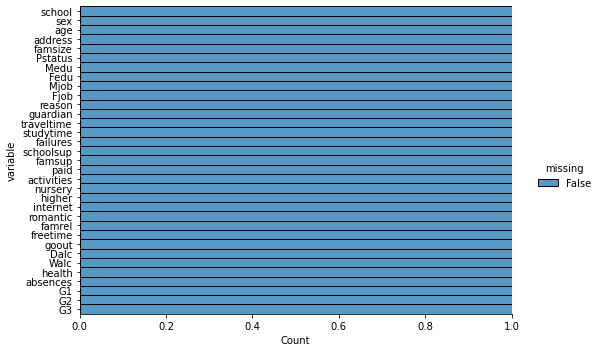

In [4]:
#Visualize missing values for maths data 
plt.figure(figsize=(10,6))
sns.displot(
    data=maths.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.5
)


<Figure size 720x432 with 0 Axes>

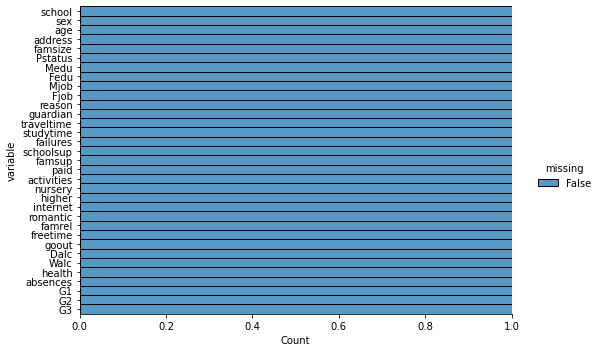

In [5]:
#Visualize missing values for portuguese data
plt.figure(figsize=(10,6))
sns.displot(
    data=portuguese.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.5
)


In [25]:
#import data together for visualization 
maths,portuguese = pd.read_csv("data/Maths.csv"), pd.read_csv("data/Portuguese.csv")
data = portuguese.copy

dalc = data["Dalc"]
## average of alcohol consumption all week
#portuguese['allweek'] = data.Dalc + data.Walc /2


TypeError: 'method' object is not subscriptable

In [7]:
level_list = [1,2,3,4,5,6]

In [16]:
# get unique counts of values and their respective labels

def label_and_size(feature):
    """
    to get the counts of uniqe values and labels
    """
    sizes = data[feature].value_counts().tolist()
    labels = []
    none = [labels.append(i[0]) for i in data[feature].value_counts().items()]
    return labels,sizes

dalc_labels, dalc_sizes = label_and_size('Dalc')
dalc_labels, dalc_sizes = label_and_size('Walc')

# Given G3 feauture is the final grade, a data frame of counts of features for only G3  will be created to do some exploratory analysis

def count_df(feature, range_list):
    
    g3_list, alcohol_list, count_list = [],[],[]
    for i in range(20):
        for j in range_list:
            alc_count = data.G3[(data.G3==i) & (data[feature]==j)].count()
            g3_list.append(i),alc_list.append(j),count_list.append(alc_count)

    alc_g3 = {feature: alc_list,
            'G3': g3_list,
            'Count': count_list}

    df = pd.DataFrame(alc_g3)
    return df

<bound method NDFrame.copy of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freet